In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
URL = "https://en.wikipedia.org/wiki/List_of_highest-certified_music_artists_in_the_United_States"
resp = requests.get(URL)
soup = BeautifulSoup(resp.text, "html.parser")

In [3]:
table = soup.find("table", {"class" : "wikitable sortable"}).tbody
rows = table.find_all("tr")
columns = [v.text.replace("\n","") for v in rows[1].find_all("td")]

In [4]:
UnitW=""
Peldany=[]
Banda=[]
Orszag=[]
Aktiv=[]
k=1
UK_DB=[]
US_DB=[]
A_DB=[]
I_DB=[]
CA_DB=[]
UA_DB=[]

while k<len(rows):
    
    rows = table.find_all("tr")
    columns = [v.text.replace("\n","") for v in rows[k].find_all("td")]
    if len(columns[0]) == 1:
        columns
        UnitW=columns[1]

    elif len(columns[0]) == 2:
        columns
        UnitW=columns[1]
    else:
        columns.insert(0,UnitW)
        columns.insert(0,"6")
        columns
    
    Peldany.append(columns[1])
    Banda.append(columns[2])
    Orszag.append(columns[3])
    Aktiv.append(columns[4])
     
    if columns[3] == "UK":
        UK_DB.append(columns[1])
    elif columns[3] == "US":
        US_DB.append(columns[1])
    elif columns[3] == "Australia":
        A_DB.append(columns[1])
    elif columns[3] == "Ireland":
        I_DB.append(columns[1])
    elif columns[3] == "Canada":
        CA_DB.append(columns[1])
    elif columns[3] == "UK/Australia":
        UA_DB.append(columns[1])
        
        
    k+=1


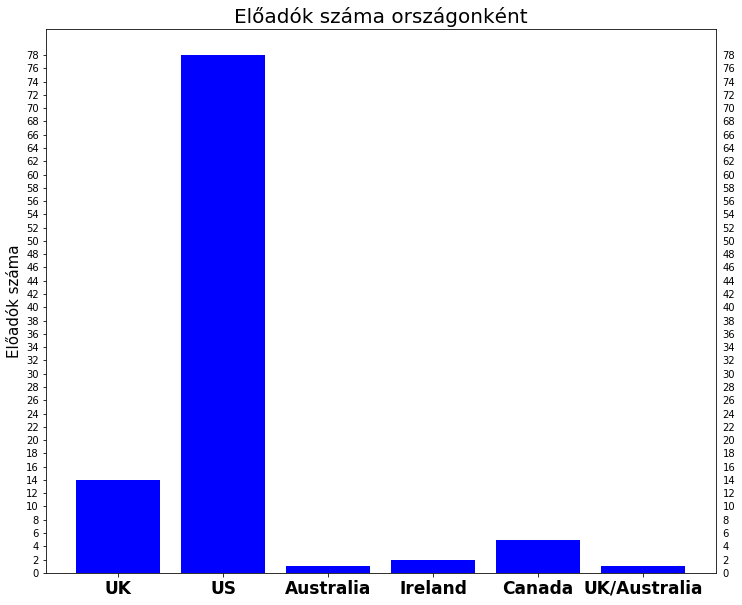

In [5]:
plt.figure(figsize=(12,10))


data=[Orszag.count("UK"),Orszag.count("US"),Orszag.count("Australia"),Orszag.count("Ireland"),Orszag.count("Canada"),
      Orszag.count("UK/Australia")]
names=('UK', 'US', 'Australia', 'Ireland', 'Canada',"UK/Australia")
long=np.arange(len(names))

plt.bar(long,data,color="blue")
plt.yticks(np.arange(0,80,step=2))
plt.xticks(long, names, color='black', fontweight='bold', fontsize='17')
plt.tick_params(labelright=True)

plt.ylabel("Előadók száma",fontsize=15,color="black")
plt.title("Előadók száma országonként",fontsize=20)

plt.show()

In [6]:
UK_P=0
US_P=0
A_P=0
I_P=0
CA_P=0
UA_P=0

UK_DB = [float(i) for i in UK_DB] 
for i in UK_DB:
    UK_P+=i
#print(UK_P)
US_DB = [float(i) for i in US_DB] 
for i in US_DB:
    US_P+=i
#print(US_P)
A_DB = [float(i) for i in A_DB] 
for i in A_DB:
    A_P+=i
#print(A_P)
I_DB = [float(i) for i in I_DB] 
for i in I_DB:
    I_P+=i
#print(I_P)
CA_DB = [float(i) for i in CA_DB] 
for i in CA_DB:
    CA_P+=i
#print(CA_P)
UA_DB = [float(i) for i in UA_DB] 
for i in UA_DB:
    UA_P+=i
#print(UA_P)

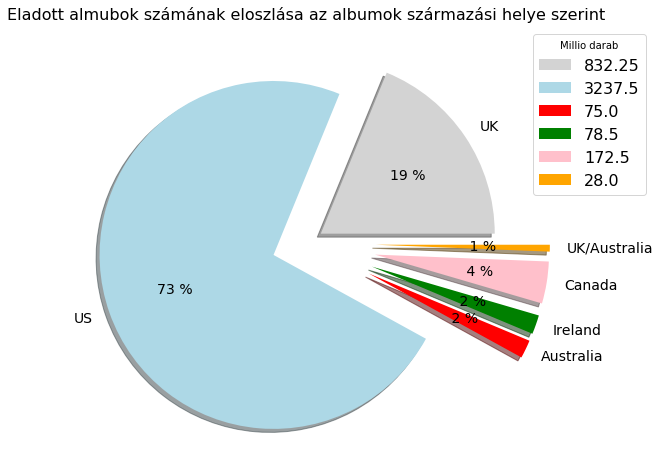

In [16]:
plt.figure(figsize=(15,8))

labels = ["UK" , "US","Australia","Ireland","Canada","UK/Australia"]
colors = ["lightgrey", "lightblue","red","green", "pink","orange"]
data=[UK_P, US_P,A_P,I_P,CA_P,UA_P]
explode=(0.1,.2,.4,.4,.4,.4)
plt.pie(data, labels=labels, colors=colors, autopct="%2.f %%", explode=explode, shadow=True,textprops={'fontsize': 14})

plt.legend(data,title="Millio darab",bbox_to_anchor=(1.3,1),prop={"size":16})


plt.title("Eladott almubok számának eloszlása az albumok származási helye szerint",fontsize=16)
plt.show()

In [8]:
ak=[]

Aktiv=([y.replace('s', '') for y in Aktiv])

for i in Aktiv:
    if len(i) > 5 and len(i) < 10:
        ak.append(i)        
    elif len(i)>10:
        ak.append(i[:9])
    else:
        ak.append(i[:4])


av=[]

for k in ak:
    av.append(k[:4])
    if k[5:]=="":
        av.append(k[:4])
    else:
        av.append(k[5:])


Evek=[int(m) for m in av]


Etized=[]
Kivon=[]
r=0
while r<len(Evek):
    szam=(Evek[r+1]-Evek[r])
    Kivon.append(szam)
    r+=2

for n in Kivon:
    Etized.append(n/10+1)


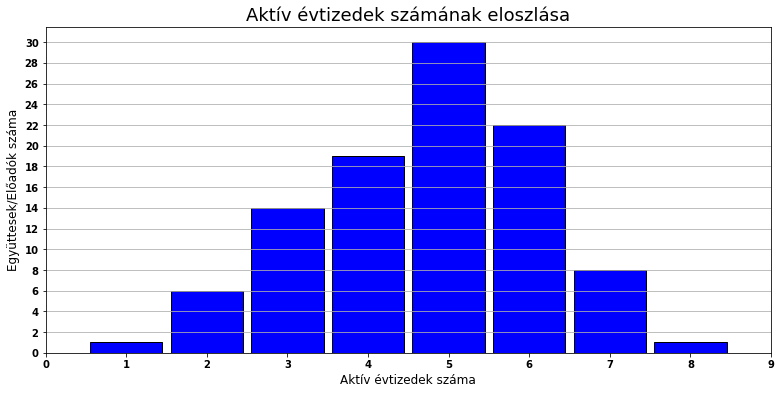

In [17]:
plt.figure(figsize=(13,6))

bins = [0,1,2,3,4,5,6,7,8,9]

plt.hist(Etized,bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5], color="blue",edgecolor="black", rwidth=0.9)

plt.yticks(np.arange(0,32,step=2),fontweight='bold')
plt.xticks(bins,fontweight='bold')
plt.xlabel("Aktív évtizedek száma",fontsize=12,color="black")
plt.ylabel("Együttesek/Előadók száma",fontsize=12,color="black")
plt.title("Aktív évtizedek számának eloszlása",fontsize=18)
plt.grid(axis="y")

plt.show()

In [10]:
jav=Evek[0]
UEvek=Evek

if len(UEvek) == len(av):
    UEvek.pop(0)
    

Aktiv_e=[]
KarVeg=UEvek[::2]


for i in KarVeg:
    if i == 2020:
        Aktiv_e.append("Aktiv")
    else:
        Aktiv_e.append("Nem Aktiv")


Aktiv_A_DB=0
Aktiv_N_DB=0
for j in Aktiv_e:
    if j == "Aktiv":
        Aktiv_A_DB+=1
    else:
        Aktiv_N_DB+=1


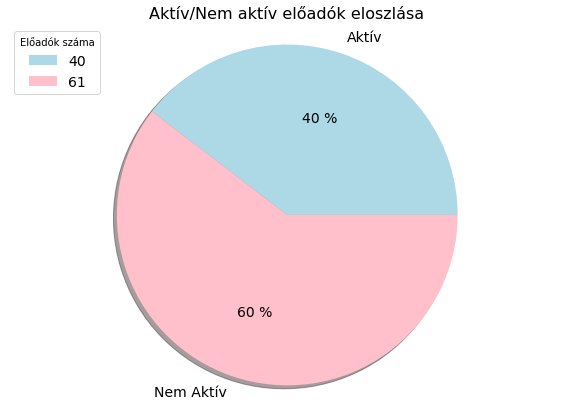

In [15]:
plt.figure(figsize=(10,7))

labels = ["Aktív" , "Nem Aktív"]
colors = ["lightblue", "pink"]
data=[Aktiv_A_DB, Aktiv_N_DB]

plt.pie(data, labels=labels, colors=colors, autopct="%2.f %%", shadow=True,textprops={'fontsize': 14})

plt.axis("equal")
plt.legend(data,loc="upper left",title="Előadók száma",prop={"size":14})


plt.title("Aktív/Nem aktív előadók eloszlása",fontsize=16)
plt.show()

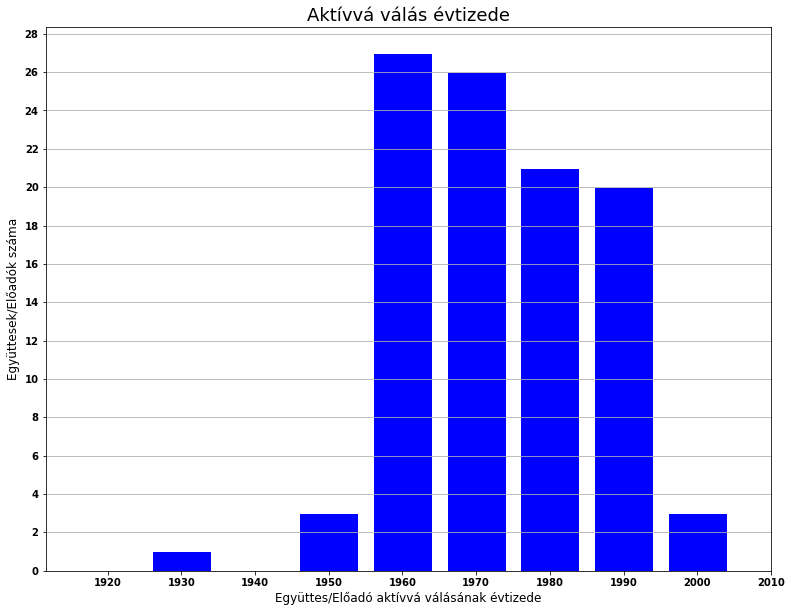

In [18]:
if len(Evek) != len(av):
    Evek.insert(0,jav)
    

plt.figure(figsize=(13,10))

bins = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]

plt.hist(Evek[::2],bins=[1915,1925,1935,1945,1955,1965,1975,1985,1995,2005], color="blue",edgecolor="white", rwidth=0.8)

plt.yticks(np.arange(0,30,step=2),fontweight='bold')
plt.xticks(bins,fontweight='bold')
plt.xlabel("Együttes/Előadó aktívvá válásának évtizede",color="black",fontsize=12)
plt.ylabel("Együttesek/Előadók száma",color="black",fontsize=12)
plt.title("Aktívvá válás évtizede",fontsize=18)
plt.grid(axis="y")


plt.show()

In [13]:
AtlagElemez=[]

AtlagElemez.append("{:.2f}".format(UK_P/len(UK_DB)))
AtlagElemez.append("{:.2f}".format(US_P/len(US_DB)))
AtlagElemez.append("{:.2f}".format(A_P/len(A_DB)))
AtlagElemez.append("{:.2f}".format(I_P/len(I_DB)))
AtlagElemez.append("{:.2f}".format(CA_P/len(CA_DB)))
AtlagElemez.append("{:.2f}".format(UA_P/len(UA_DB)))

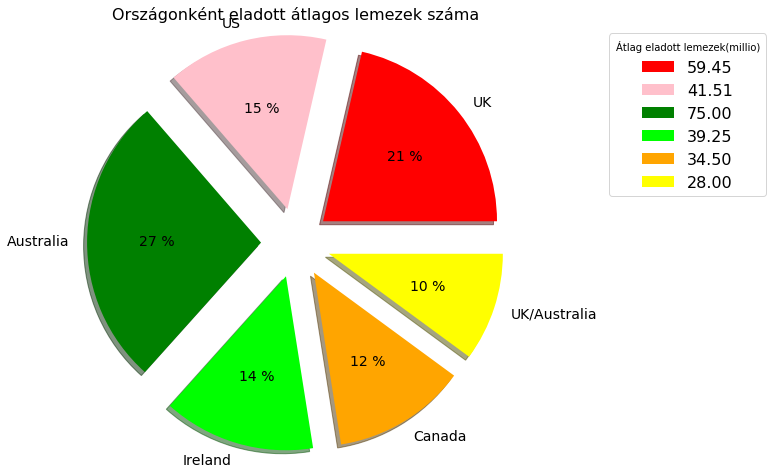

In [14]:
plt.figure(figsize=(14,8))
colors = ["red","pink","green","lime","orange","yellow"]
labels = ["UK" , "US","Australia","Ireland","Canada","UK/Australia"]
explode=(.2,.2,.2,.2,.2,.2)
plt.pie(AtlagElemez, labels=labels, colors=colors, autopct="%2.f %%", explode=explode, shadow=True,textprops={'fontsize': 14})

plt.legend(AtlagElemez,loc="upper right",title="Átlag eladott lemezek(millio)",bbox_to_anchor=(1.6,1),prop={"size":16})


plt.title("Országonként eladott átlagos lemezek száma",fontsize=16)
plt.show()